<a href="https://colab.research.google.com/github/Nagooo2000/data_file/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.importing library pandas & nmpy for numers & for uploading data table

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
filepath='https://raw.githubusercontent.com/Nagooo2000/econometrics-data/main/Assignment%203%20(1).csv?token=GHSAT0AAAAAABUU57FWX5M6SZ4SVC26RSKWYUS5DCQ'

In [ ]:
macro_data=pd.read_csv(filepath,parse_dates=['Time'],index_col='Time')

In [ ]:
macro_data.head()

,Y,X
Time,,
1969-01-01,51.53,12252
1970-01-01,50.23,12516
1971-01-01,54.63,12608
1972-01-01,64.48,12861
1973-01-01,51.82,13091


2.ploting the data table

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

3.spilting the data into train(90%) & test (10%) using the **train data for ADFULLER,VAR & VARMAX**

In [ ]:
macro_data

,Y,X
Time,,
1969-01-01,51.53,12252
1970-01-01,50.23,12516
1971-01-01,54.63,12608
1972-01-01,64.48,12861
1973-01-01,51.82,13091
1974-01-01,36.13,13284
1975-01-01,47.64,13496
1976-01-01,57.88,13717
1977-01-01,52.50,13942


In [ ]:
train_dt=macro_data[0:-12].dropna()
test_dt=macro_data[-12:].dropna()

In [ ]:
train_dt.tail()

,Y,X
Time,,
1976-01-01,57.88,13717
1977-01-01,52.50,13942
1978-01-01,53.62,14184
1979-01-01,61.75,14471
1980-01-01,77.86,14738


In [ ]:
test_dt

,Y,X
Time,,
1981-01-01,71.11,14988
1982-01-01,81.03,15189
1983-01-01,95.18,15417
1984-01-01,96.38,15599
1985-01-01,121.58,15837
1986-01-01,138.58,16117
1987-01-01,138.23,16361
1988-01-01,156.26,16587
1989-01-01,195.01,16806


4.import ADFULLER for stationarity check

In [ ]:
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
print('p value of original Y')
adfuller(train_dt.Y)[1]

p value of original Y


0.9971995630345153

This p value is higher than 0.05 so original Y not stationarity

In [ ]:
print ('p value of 1st order diff Y')
adfuller(train_dt.Y.diff().dropna())[1]

p value of 1st order diff Y


0.7439462753186002

In [ ]:
print('p value of 2nd order diff Y')
adfuller(train_dt.Y.diff().diff().dropna())[1]

p value of 2nd order diff Y


0.003523544369967598

In [ ]:
train_dt.diff2=(train_dt.Y.diff().diff().dropna())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [ ]:
train_dt.head()

,Y,X
Time,,
1969-01-01,51.53,12252
1970-01-01,50.23,12516
1971-01-01,54.63,12608
1972-01-01,64.48,12861
1973-01-01,51.82,13091


In [ ]:
train_dt.diff2.head()

Time
1971-01-01     5.70
1972-01-01     5.45
1973-01-01   -22.51
1974-01-01    -3.03
1975-01-01    27.20
Name: Y, dtype: float64

5.VAR

In [ ]:
from statsmodels.tsa.api import VAR

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
model=VAR(train_dt)

In [ ]:
result=model.fit()

In [ ]:
print(result.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 29, May, 2022
Time:                     03:30:31
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    13.0652
Nobs:                     11.0000    HQIC:                   12.7114
Log likelihood:          -95.8818    FPE:                    391027.
AIC:                      12.8482    Det(Omega_mle):         241400.
--------------------------------------------------------------------
Results for equation Y
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const       -48.471442        58.290781           -0.832           0.406
L1.Y          0.453269         0.419203            1.081           0.280
L1.X          0.005995         0.004348            1.379           0.168

Results for equation X

6.import VARMAX for constructing actual VAR model

In [ ]:
from statsmodels.tsa.statespace.varmax import VARMAX

In [ ]:
VARMAX_model=VARMAX(train_dt.diff()[1:],order=(1,0))

In [ ]:
VARMAX_result=VARMAX_model.fit(disp=False)

In [ ]:
print(VARMAX_result.summary())

                           Statespace Model Results                           
Dep. Variable:             ['Y', 'X']   No. Observations:                   11
Model:                         VAR(1)   Log Likelihood                 -98.284
                          + intercept   AIC                            214.567
Date:                Sun, 29 May 2022   BIC                            218.149
Time:                        03:39:00   HQIC                           212.310
Sample:                    01-01-1970                                         
                         - 01-01-1980                                         
Covariance Type:                  opg                                         
Ljung-Box (Q):                         nan   Jarque-Bera (JB):           0.63, 6.05
Prob(Q):                               nan   Prob(JB):                   0.73, 0.05
Heteroskedasticity (H):         1.29, 0.34   Skew:                     -0.36, -1.48
Prob(H) (two-sided):            0.81,

7.use of VAR model for forecasting next(10% time)

In [ ]:
n_forecast=12
predict=VARMAX_result.get_prediction(start=len(train_dt),end=len(train_dt)+n_forecast-1)

In [ ]:
predictions=predict.predicted_mean

In [ ]:
predictions.coloumns=[['X_p,Y_p']]
predictions

,Y,X
1982-01-01,2.149839,224.308772
1983-01-01,2.579057,226.604562
1984-01-01,2.552951,226.794473
1985-01-01,2.543788,226.712267
1986-01-01,2.545428,226.715330
1987-01-01,2.545515,226.717280
1988-01-01,2.545461,226.716999
1989-01-01,2.545464,226.716974
1990-01-01,2.545465,226.716984
1991-01-01,2.545465,226.716984


In [ ]:
test_dt

,Y,X
Time,,
1981-01-01,71.11,14988
1982-01-01,81.03,15189
1983-01-01,95.18,15417
1984-01-01,96.38,15599
1985-01-01,121.58,15837
1986-01-01,138.58,16117
1987-01-01,138.23,16361
1988-01-01,156.26,16587
1989-01-01,195.01,16806


In [ ]:
TvP=pd.concat([test_dt, predictions],axis=1)

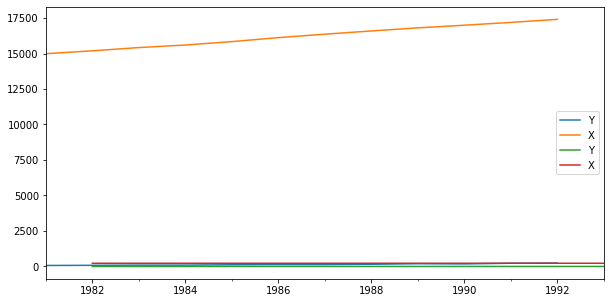

In [ ]:
TvP.plot(figsize=(10,5))